In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {
    'Producto': [
        'Manzana', 'Banana', 'Naranja', 'Naranja', 'Papaya',
        'Banana', 'Banana', 'Papaya', 'Naranja', 'Naranja',
        'Banana', 'Manzana', 'Manzana', 'Papaya', 'Banana'
    ],
    'Categoria': [
        'Fruta', 'Fruta', 'Tropical', 'Tropical', 'Tropical',
        'Fruta', 'Fruta', 'Tropical', 'Tropical', 'Tropical',
        'Fruta', 'Fruta', 'Fruta', 'Tropical', 'Fruta'
    ],
    'Ventas': [120, 95, 210, 175, 140, 200, 180, 130, 160, 145, 220, 155, 190, 170, 205],
    'Precio_Unitario': [1.20, 0.85, 1.50, 2.10, 1.75, 0.95, 1.10, 2.00, 1.65, 1.80, 1.05, 1.25, 1.40, 1.90, 1.00],
    'Fecha': pd.date_range(start='2025-09-01', periods=15, freq='D')
}

df = pd.DataFrame(data)
print("DataFrame Original:")
display(df)

DataFrame Original:


,Producto,Categoria,Ventas,Precio_Unitario,Fecha
0,Manzana,Fruta,120,1.20,2025-09-01
1,Banana,Fruta,95,0.85,2025-09-02
2,Naranja,Tropical,210,1.50,2025-09-03
3,Naranja,Tropical,175,2.10,2025-09-04
4,Papaya,Tropical,140,1.75,2025-09-05
5,Banana,Fruta,200,0.95,2025-09-06
6,Banana,Fruta,180,1.10,2025-09-07
7,Papaya,Tropical,130,2.00,2025-09-08
8,Naranja,Tropical,160,1.65,2025-09-09
9,Naranja,Tropical,145,1.80,2025-09-10


In [3]:
# Operaciones de agregación
print("\nSuma de Ventas por Categoría:")
ventas_por_categoria = df.groupby('Categoria')['Ventas'].sum().reset_index()
display(ventas_por_categoria)


Suma de Ventas por Categoría:


,Categoria,Ventas
0,Fruta,1365
1,Tropical,1130


In [4]:
# Total de ventas por productoç
print("\nTotal de Ventas por Producto:")
total_ventas_producto = df.groupby('Producto')['Ventas'].sum().reset_index()
display(total_ventas_producto)


Total de Ventas por Producto:


,Producto,Ventas
0,Banana,900
1,Manzana,465
2,Naranja,690
3,Papaya,440


In [5]:
# Promedio de Precio Unitario por Producto
print("\nPromedio de Precio Unitario por Producto:")
promedio_precio_producto = df.groupby('Producto')['Precio_Unitario'].mean().reset_index()
display(promedio_precio_producto)


Promedio de Precio Unitario por Producto:


,Producto,Precio_Unitario
0,Banana,0.990000
1,Manzana,1.283333
2,Naranja,1.762500
3,Papaya,1.883333


In [6]:
# Multiples agregaciones
print("\nMúltiples Agregaciones por Producto:")
multiples_agregaciones = df.groupby('Producto').agg({
    'Ventas': ['sum', 'mean', 'max'],
    'Precio_Unitario': ['mean', 'min']
}).reset_index()

display(multiples_agregaciones)


Múltiples Agregaciones por Producto:


Producto Ventas                  Precio_Unitario      
              sum        mean  max            mean   min
0   Banana    900  180.000000  220        0.990000  0.85
1  Manzana    465  155.000000  190        1.283333  1.20
2  Naranja    690  172.500000  210        1.762500  1.50
3   Papaya    440  146.666667  170        1.883333  1.75

In [7]:
# Aplicar a una sola columna funciones de agregación
print("\nAgregaciones de Ventas por Producto:")
agregaciones_ventas = df.groupby('Producto')['Ventas'].agg(['sum', 'mean', 'max']).reset_index()
display(agregaciones_ventas)


Agregaciones de Ventas por Producto:


,Producto,sum,mean,max
0,Banana,900,180.000000,220
1,Manzana,465,155.000000,190
2,Naranja,690,172.500000,210
3,Papaya,440,146.666667,170


In [8]:
# Por categoría y producto
print("\nVentas Totales por Categoría y Producto:")
ventas_categoria_producto = df.groupby(['Categoria', 'Producto']).agg(
    Total_Ventas=('Ventas', 'sum'),
    Promedio_Precio=('Precio_Unitario', 'mean')).reset_index()
display(ventas_categoria_producto)





Ventas Totales por Categoría y Producto:


,Categoria,Producto,Total_Ventas,Promedio_Precio
0,Fruta,Banana,900,0.990000
1,Fruta,Manzana,465,1.283333
2,Tropical,Naranja,690,1.762500
3,Tropical,Papaya,440,1.883333


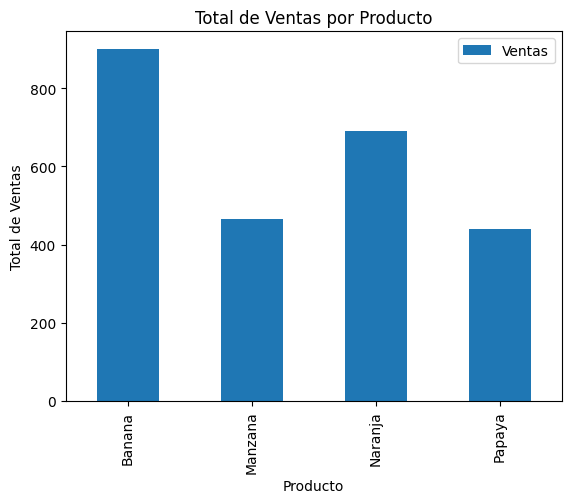

In [9]:
import matplotlib.pyplot as plt
total_ventas_producto.plot(kind='bar', x='Producto', y='Ventas', title='Total de Ventas por Producto')
plt.ylabel('Total de Ventas')
plt.show()